# Ai Academy Capstone Group 4
Presented by Brian Gorbea, Kelvin Cupay, Robert Cofer, Rob Masters, Ryan Lazar

## Overview
Using Explanatory data analysis(EDA) and statistical methods we are going to advice Computing Vision how the best way to jump start their new movie studio, called 'Computing Vision Entertainment'. We used sqlite3 in pandas to query the datasets given and hypothesis testing to evaluate our findings. Essentially, we are generating insights for their business and stake holders by making a two part suggestion, one is the early stage of the movie studio and scalability after several years.



## Business Understanding: 

Goals: The business question we are going to answer
Assumption : The parent company 'Computing Vision' does not have much backgrounk in creating movies.
1. Best investment in order to quick start the revenue of new movie studio 'Computing Vidion Entertainment'
2. Best investment in order to scale the business and future ventures in the business industry

This notebook will drive deeper into how we utilize the data sets to create meaningful visualizations and aggregrations in order to achieve our goals listed above.

We will also create hypothesis test to evaluate our findings and reccomendations which are based in scietific & mathematical reasonings. The reccomendation for the *head of Computing Vision's new movie studio* and help him decide which films to create the best film in terms of profits and appreciation.

### Real World Application(real-world problem): Today less people are going to the theatres and watching movies. Maybe Hollywood has gone stale and have stagnanted with their ways of creating movies, maybe through insights of what is most profitable for a new and small scale movie studio someone can use this information to create and start their new movie business.REVISIT)

## Stakeholders:(REVISIT CHECK WITH ROB)
- `Investors`: Can identify by profits if rate on investment(ROI) is significant for them to invest in Computing Vision Entertainment
- `Computing Vision(Parent Company)`: Is it worth it to make 
- `Critics`: Is this new movie studio just for profits or they actually want to create movies that are well liked
- `Fans`: Do we like the movies from this mobie studio
- `Potential future fans`: Repuation of this new in coming movie studio
- `Competing fans`: How well will this Computing Vision Entertainment handle the competing movie studios

# Middle : Methodology (START)
* Data Understanding
    
* Data Analysis
    * 3 visualizations
* Statistical Inference

* Rationale
    * For example, why are you using hypothesis testing rather than just a graph?
    * What about the problem or data is suitable for this form of analysis?
    * For a data science audience, this includes your reasoning for the changes you applied and choices you made while building confidence intervals and/or hypothesis tests.
 

## Data Undertanding: 
The data set comes from several sources where some are compressed into CSV(comma-separated values) or TSV(tab-separated values). The data sets listed below are from these respectable sources: [Box Office Mojo](https://www.boxofficemojo.com/), [IMDB](https://www.imdb.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), [The MovieDB](https://www.themoviedb.org/), [The Numbers](https://www.the-numbers.com/).

Here is a list of the data sets use:
- `bom.movie_gross.csv.gz`: each record is a movie with a title(object), domestic_gross(object), foreign_gross(float), and year released(int)
- `im.db.zip`: 
- `rt.movie_info.tsv.gz`:
- `rt.reviews.tsv.gz`:
- `tmdb.movies.csv.gz`:
- `tn.movie_budgets.csv.gz:`


In [2]:
# imports
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sqlite3
import zipfile
%matplotlib inline

In [3]:
#add data / making dataframes
movie_gross_df = pd.read_csv('../../data/bom.movie_gross.csv.gz')
movie_info_df = pd.read_csv('../../data/rt.movie_info.tsv.gz', sep='\t')
reviews_df = pd.read_csv('../../data/rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')
movies_df = pd.read_csv('../../data/tmdb.movies.csv.gz', encoding='latin1')
movie_budgets_df = pd.read_csv('../../data/tn.movie_budgets.csv.gz', encoding='latin1') 

## Visualization (Start)
Ryan Lazar's Codez

# Data Organizing, Data Merging, Data Formatting, Data Calculation

Change the column "title in the bom.movie dataframe. This will then allow us to merge both dataframes on that column.

After the column name was changed we can now merge and begin our data exploration.

Before we can work with the numbers in the columns we have to remove the $ and any spaces that may exist.

Now we create a profit column in the dataframe and we calculate that by subtracting the "production_budget" column from the "worldwide_gross" column. It is a large number so we then divide by 1,000,000 to change it out of scientific notation.

In [4]:
# Rename the title column to movie for merge with the movie_budget dataframe
movie_gross_df = movie_gross_df.rename(columns={'title': 'movie'})

In [5]:
#connect moviegross and moviebudgets on movie
gross_budgets = pd.merge(movie_gross_df, movie_budgets_df, on= 'movie')

In [6]:
# Have to reformat the worldwide_gross and production_budget columns to remove $ and space
gross_budgets['worldwide_gross'] = gross_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
gross_budgets['production_budget'] = gross_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)

In [7]:
# Create a profit column by subtracting production_budget from worldwide_gross
gross_budgets['profit'] = (gross_budgets['worldwide_gross'] - gross_budgets['production_budget'])/1000000

# First Visualization
This graph shows the top 10 studios that have the highest profit on average. It was created by combing the two dataframes movie_gross_df and  movie_budgets_df, calculating profit, and then grouping by the studio. The values are the average profit (mean).

Text(0.5, 1.0, 'Top 10 Studios by Average Profit')

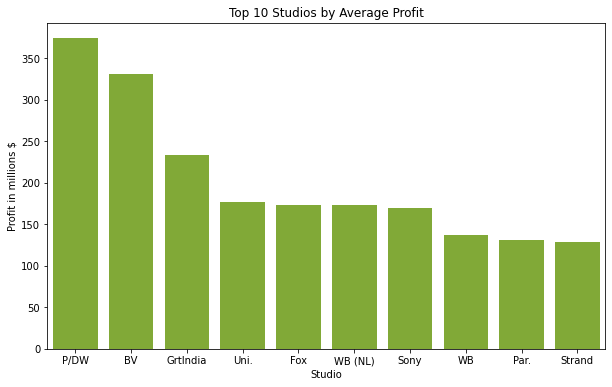

In [8]:
# Plot top 10 - Cleaned up
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='studio', y='profit', data=gross_budgets.groupby('studio')['profit'].mean().nlargest(10).reset_index(), color="#86BC24")
plt.ylabel('Profit in millions $')
plt.xlabel('Studio')
plt.title('Top 10 Studios by Average Profit')

## Visualization (End)
Ryan Lazar's Code

## Visualization (Start)
Brian Gorbea Code

#### Importing and starting the sqlite

In [9]:
# Path to the zip file
zip_file_path = '../../data/im.db.zip'
# Folder to extract the zip file contents
extract_folder = '../../Unzipped_database'

The process here is pulling the databse file, unzipping the file and extracting the file to a local location. The file is then opened and read using SQL commands within python. Python pulls the data and stores it in the a variable called a dataframe for later use.

In [10]:
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the contents of the zip file to the extract_folder
    zip_ref.extractall(extract_folder)

In [11]:
db_file_path = f'{extract_folder}/im.db'
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

In [12]:
q = """
SELECT primary_title, genres
FROM movie_basics
;"""
movie_genres = pd.read_sql_query(q, conn)

# Start of data pulling and organization
Below the data is being pulled from each file and being stored to a variable for use.

The genre data in the database stored more than one genre per movie. The solution was to seperate the genres and pull the first genre that appears and mark that as the primary genre.



These are using sql so df has to be restablished

In [13]:
movie_genres['primary_genre'] = movie_genres['genres'].str.split(',').str.get(0)

In [14]:
movie_genres = movie_genres.rename(columns={'primary_title': 'movie'})

In [15]:
movie_budgets_df = pd.read_csv('../../data/tn.movie_budgets.csv.gz', encoding='latin1', index_col=0)

In [16]:
movie_gross_df = pd.read_csv('../../data/bom.movie_gross.csv.gz')

In [17]:
movie_gross_df = movie_gross_df.rename(columns={'title': 'movie'})

In [18]:
Bugets_Gross_df = pd.merge(movie_gross_df, movie_budgets_df, on=['movie'])

# Cleaning the gross and budget data
The steps below looks at the columns for world wide gross and production budgets and turn them into readable values that python can use to do calculations. This way we can easily create the profit table to use for the vizualizations.

In [19]:
# Clean the worldwide_gross column
Bugets_Gross_df['worldwide_gross'] = Bugets_Gross_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')

In [20]:
# Convert the column to float
Bugets_Gross_df['worldwide_gross'] = Bugets_Gross_df['worldwide_gross'].astype(float)

In [21]:
# Clean the production_budget column
Bugets_Gross_df['production_budget'] = Bugets_Gross_df['production_budget'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
Bugets_Gross_df['production_budget'] = Bugets_Gross_df['production_budget'].astype(float)

In [22]:
# Calculate the profit column
Bugets_Gross_df['profit'] = Bugets_Gross_df['worldwide_gross'] - Bugets_Gross_df['production_budget']

# Sorting data 
The data is being sorted by most profitable to least profitable. One it has been sorted the data grabs the top 10 results from the list. The top ten list is then used for vizualiation later for top ten profitable movies.

In [23]:
profit_sorted= Bugets_Gross_df.sort_values(by='profit', ascending=False)
topTen = profit_sorted.head(10)

In [24]:

topTen_rev = topTen.iloc[::-1].reset_index(drop=True)
topTen_rev['profit'] = topTen_rev['profit']/1000000

# This is the end of the major data collection
The base data has been sorted.

In [25]:
# takes in values and reformats values (handles negative values)
def format_values(value):
    if value >= 1000000000: # Billions
        return f"{value / 1000000000:.1f}B"
    elif value >= 1000000: # Millions
        return f"{value / 1000000:.1f}M"
    elif value < 0 and abs(value) >= 1000000: # Negative Millions
        return f"{value / 1000000:.1f}M"
    elif value >= 1000: # Thoudsands
            return f"{value / 1000:.1f}K"
    else:
        return str(value)

In [26]:
# takes in values and reformats values 
# these are used in the bargraphs
# handles x values
def format_values_x(value):
    if value >= 1000000000: # Billions
        return f"{value / 1000000000:.1f}"
    elif value >= 1000000: # Millions
        return f"{value / 1000000:.1f}"
    elif value <0 and abs(value) >= 1000000: # Negative Millions
        return f"{value / 1000000:.1f}"
    else:
        return str(value)

In [27]:
# sorting profit from profitable to least profitable(descending order)
profit_sorted= gross_budgets.sort_values(by='profit', ascending=False)

# Creating Data
Data is being merged and calculated to represent the average based on the primary genre of a movie.

In [28]:
# merging movies genres and profit sorted on movie
profgenre = pd.merge(movie_genres, profit_sorted, on=['movie'])

In [29]:
# grouping by primary genre and getting mean then sorting by profit
profgenre_grouped = profgenre.groupby('primary_genre').mean()['profit'].sort_values()

# Second Visualization - Top Ten Profitable Genres with a Buget Under 10M

The vizualization is used to get the average profit based on genre. This data can represent which genres don't do well and what to potentially avoid. Such as making a Western movie may not produce results.


In [30]:
# merge budget gross and movie genres on movie
budget_UTen = pd.merge(Bugets_Gross_df,movie_genres, on = 'movie')

The data is merged on movie names then sorted to only include production budgets under 10m. Once the data has been sorted the mean value for the primary genre is calculated and is sorted based on the total profit. What this produces is a dataframe with two columns. The first column is the name of the genre and the second column is the averaged profit that genre made in the past 50 years while also maintaing a budget under 10m.

In [31]:
# selecting production budget under 10 mill
budget_UTen = budget_UTen[budget_UTen['production_budget']< 10000000]

In [32]:
# grouping by primary genre then getting mean  then sorting by profit
budget_UTen_mean =budget_UTen.groupby('primary_genre').mean()['profit'].sort_values()

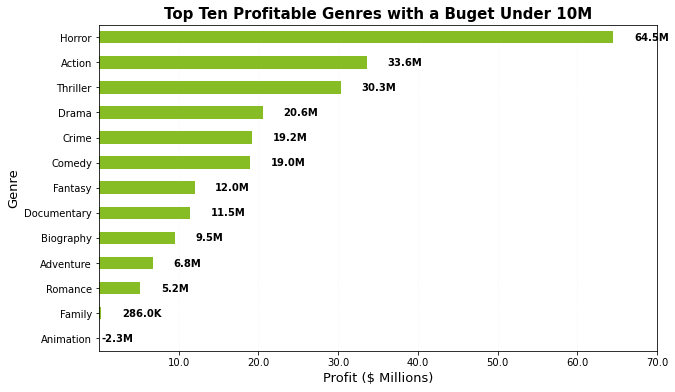

In [33]:
#Plotting
fig, ax = plt.subplots(figsize=(10,6))
budget_UTen_mean.plot(kind='barh',color='#86BC24', ax=ax)

#Title and labels
ax.set_title('Top Ten Profitable Genres with a Buget Under 10M', fontweight='bold', fontsize=15)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([format_values_x(x) for x in ax.get_xticks()])
ax.set_xlabel('Profit ($ Millions)', fontsize=13)
ax.set_ylabel('Genre', fontsize=13)
ax.grid(axis='x', linestyle='--', alpha = 0.07)
ax.set_xlim(1, ax.get_xlim()[1])

#for index, value in enumerate(budget_UTen_mean):
#    formatted_value = "${:.1f}".format(value)
#    ax.text(value , index, ' ' + str(formatted_value), va='center', fontweight = 'bold', fontsize =11)
for index, value in enumerate(budget_UTen_mean):
    ax.text(value + (0.04 * max(budget_UTen_mean)), index,format_values(value), va = 'center', color = 'black', fontweight='bold')


plt.tight_layout
plt.show()

## Third Visualization - Top Average Profits by Genre
The vizualization is used to get the average profit based on genre. This data can represent which genres don't do well and what to potentially avoid. Such as making a Western movie may not produce results.

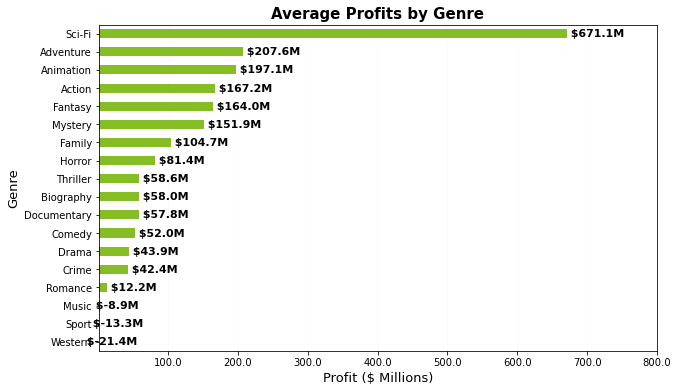

In [34]:
#Plotting
fig, ax = plt.subplots(figsize=(10,6))
profgenre_grouped.plot(kind='barh', color="#86BC24", ax=ax)

#Title and labels
ax.set_title('Average Profits by Genre', fontweight='bold', fontsize=15)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([format_values_x(x) for x in ax.get_xticks()])
ax.set_xlabel('Profit ($ Millions)', fontsize=13)
ax.set_ylabel('Genre', fontsize=13)
ax.grid(axis='x', linestyle='--', alpha = 0.07)
ax.set_xlim(1, ax.get_xlim()[1])


for index, value in enumerate(profgenre_grouped):
    formatted_value = "${:.1f}M".format(value)
    ax.text(value, index, ' ' + str(formatted_value), va='center', fontweight = 'bold', fontsize =11)

plt.tight_layout
plt.show()

## Visualization (End)
Brian Gorbea Code

# Data Analysis(start)

Rob Master's Code

In [35]:
#rename dfs to connect on the unique ID movie
movies_df = movies_df.rename(columns={'original_title': 'movie'})
movie_gross_df = movie_gross_df.rename(columns={'title': 'movie'})

In [36]:
#connect moviegross and moviebudgets on movie
gross_budgets = pd.merge(movie_gross_df, movie_budgets_df, on=['movie'])

Below we clean out the new dataframe gross budgets to modify the worldwide_gross and production budget values to ensure we can calculate profit. This starts by removing '$' and ',' from the cells and then converting the data into float.

In [37]:
#cleaned for profit and hypothesis testing

# Clean the worldwide_gross column
gross_budgets['worldwide_gross'] = gross_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
gross_budgets['worldwide_gross'] = gross_budgets['worldwide_gross'].astype(float)

# Clean the production_budget column
gross_budgets['production_budget'] = gross_budgets['production_budget'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
gross_budgets['production_budget'] = gross_budgets['production_budget'].astype(float)

Here we do the same thing, except this is just for the frequency analysis. Since we dont need studio information, it is better that we use just the movie_budgets_df dataframe as we get better quality data in regards to profits as there isn't data lost from the merge.

In [38]:
#Movie budget DF used as there is more data for the frequency analysis for profit- keep this

# Clean the worldwide_gross column
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(float)

# Clean the production_budget column
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(float)

Here we calculate profits and change the vaules of profit and production budget to be represented in the millions. This is just for the movie budget dataframe.

In [39]:
#create profit
movie_budgets_df['profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
#represented in millions
movie_budgets_df['profit'] = movie_budgets_df['profit'] / 1000000

In [40]:
#create profit
gross_budgets['profit'] = gross_budgets['worldwide_gross'] - gross_budgets['production_budget']
#represented in millions
gross_budgets['profit'] = gross_budgets['profit'] / 1000000

## Analysis on profit
Here we do a general analysis about profits. We use this dataframe because it has better data quality.

In [41]:
#stat info on profit
profit_stats = movie_budgets_df['profit'].describe()
print(profit_stats)

count    5782.000000
mean       59.899704
std       146.088881
min      -200.237650
25%        -2.189071
50%         8.550286
75%        60.968502
max      2351.345279
Name: profit, dtype: float64


## Creating histogram for profit
Below we create a histogram for profit. This provides us with a general anaysis of where profit lines up for all films, generally showing us the types of returns we can expect.

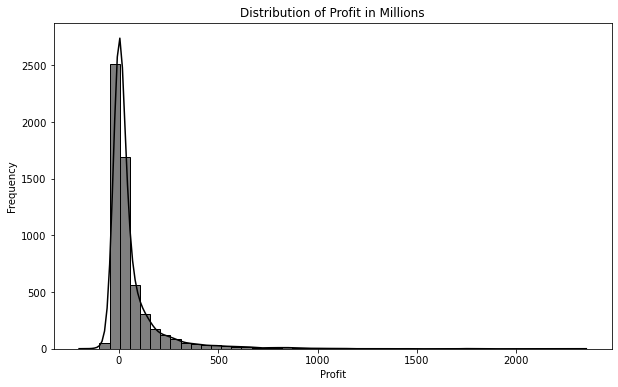

In [42]:
# Draw a histogram for profit
plt.figure(figsize=(10, 6))
sns.histplot(data=movie_budgets_df, x='profit', kde=True, bins = 50,
             color='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit in Millions')
plt.show()

## Null Hypothesis:
Typically there is no relationship between A and B. In our case, profit has no relationship to any of the top 3 occuring studios.

## Alternative Hypothesis:
The alternative hypothesis is traditionally thought of when creating a hypothesis for an experiment. In our case, profit has a relationship to all or some of the top 3 occuring studios.

## General anaylsis for developing hypothesis testing
Here we check for all unique studios in order to get an idea of all the potential studios to emulate.

In [43]:
#check all the unique studios
studio_list = gross_budgets['studio'].unique()
studio_list

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'FoxS',
       'SGem', 'WB (NL)', 'LGF', 'MBox', 'W/Dim.', 'Focus', 'MGM',
       'Over.', 'Mira.', 'NM', 'CBS', 'SPC', 'ParV', 'Gold.', 'RAtt.',
       'Magn.', 'IFC', 'Free', '3D', 'Wein.', 'Rela.', 'Anch.', 'App.',
       'Drft.', 'IW', 'Relbig.', 'Viv.', 'Eros', 'Scre.', 'UTV', 'Kino',
       'ATO', 'First', 'GK', 'NFC', 'Strand', 'Mont.', 'IVP', 'FD',
       'TriS', 'ORF', 'Jan.', 'Osci.', 'OMNI/FSR', nan, 'SMod', 'WHE',
       'P4', 'ALP', 'LG/S', 'RTWC', 'MNE', 'LD', 'Yash', 'IM', 'A24',
       'PH', 'EOne', 'ELS', 'CE', 'Saban', 'DR', 'Trib.', 'KE', 'VE',
       'EC', 'BG', 'PFR', 'BST', 'BH Tilt', 'BSC', 'FCW', 'Cohen', 'LGP',
       'TFA', 'Alc', 'STX', 'Orch.', 'PNT', 'CJ', 'Cleopatra', 'BBC',
       'GrtIndia', 'Neon', 'Affirm', 'ENTMP', 'Studio 8', 'Annapurna',
       'Global Road', 'Amazon', 'RLJ'], dtype=object)

Here we check to see the total count of each studio. We are focusing on high studio frequency in the dataset to get an accurate pvalue test, as studios like Trib or FCW will not provide us with accurate results

In [44]:
#check to see the total count of each studio
#low studio frequency will not be accurately represented with the data so we choose to analyze the top 3 occuring
studio_counts = gross_budgets['studio'].value_counts()
print(studio_counts)

Uni.       117
Fox        110
WB         102
Par.        74
Sony        74
          ... 
IM           1
Viv.         1
DR           1
SMod         1
Relbig.      1
Name: studio, Length: 99, dtype: int64


## Hypothesis testing
In this code we run a loop to check 3 different top occuring studios independently to see if they are significant to profit. We create a place to store the studios, and then create the loop which counts studios, sorts them by an occurrence count in decending order and then grabs the top 3 to do a p-value test independently of each other for studio and profit. One other condition we check for is if there is a null value for studio and drop it from the results.


In [45]:
#in this code we run a loop to check 3 different top occuring studios
# to see if they are significant to profit

#place to store studios
studio_counts = {}
studio_list = gross_budgets['studio'].unique()

for studio in studio_list:
    #count studios
    count = len(gross_budgets[gross_budgets['studio'] == studio])
    studio_counts[studio] = count

# Sort the dictionary by values (occurrence count) in descending order
sorted_studios = sorted(studio_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 3 studio occurances in the dataset significance with profit:")
#grab the top 10
for studio, count in sorted_studios[:3]:
    #create var for pvalue with respect to studio and profit
    studio_profit = gross_budgets[gross_budgets['studio'] == studio]['profit']
    #pvalue test
    t_statistic, p_value = stats.ttest_1samp(studio_profit, popmean=0)
    # Check if p-value is not null
    if not np.isnan(p_value): 
        #then print the results
        print(f"{studio}: {p_value}")

Top 3 studio occurances in the dataset significance with profit:
Uni.: 3.688020261558896e-10
Fox: 9.610055205557015e-17
WB: 4.328957530102738e-10


## Rejecting the null hypothesis: 
Based on the results of each of the three studios being significant at the 95% threshold, we reject the null and accept the alternative that any of the top 3 occuring studios will help with profit


## Confidence Intervals
Here in the code below we check the confidence interval for profit for films with a production budget under 10 million dollars.

In [46]:
# Create a new dataframe with production budgets under 10 million
production_budget_under_10m = gross_budgets[gross_budgets['production_budget'] < 10000000]

confidence_level = 0.95
sample_size = len(production_budget_under_10m['profit'])

mean_profit = np.mean(production_budget_under_10m['profit'])
std_dev = np.std(production_budget_under_10m['profit'])
std_error = stats.sem(production_budget_under_10m['profit'])

margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, sample_size - 1)

lower_bound_low10 = round(mean_profit - margin_of_error, 2)
upper_bound_low10 = round(mean_profit + margin_of_error, 2)

print(f"The {confidence_level * 100}% confidence interval for movie budgets under 10 million represented in millions is: ({lower_bound_low10}, {upper_bound_low10})")

The 95.0% confidence interval for movie budgets under 10 million represented in millions is: (15.59, 26.02)


We do the same thing as above but for films with a production budget over 10 million dollars.

In [47]:
# Create a new dataframe with production budgets greater than or equal to 10 million
production_budget_over_10m = gross_budgets[gross_budgets['production_budget'] >= 10000000]
confidence_level = 0.95
sample_size = len(production_budget_over_10m['profit'])

mean_profit = np.mean(production_budget_over_10m['profit'])
std_dev = np.std(production_budget_over_10m['profit'])
std_error = stats.sem(production_budget_over_10m['profit'])

margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, sample_size - 1)

lower_bound_up10 = round(mean_profit - margin_of_error, 2)
upper_bound_up10 = round(mean_profit + margin_of_error, 2)

print(f"The {confidence_level * 100}% confidence interval for movie budgets under 10 million represented in millions is: ({lower_bound_up10}, {upper_bound_up10})")

The 95.0% confidence interval for movie budgets under 10 million represented in millions is: (115.68, 142.52)


Rob Master's Code

# End
* Recommendations
    * 3 reccs
* Next Steps
* Thank You
* This slide should include a prompt for questions as well as your contact information (name and LinkedIn profile)

# Business Recommendations

When we started to work and explored data we thought it was Computing Vision's best interest to have a `2 phase` recommendation. The first one being the short term phase(0-5 years) which consist of limiting capital expenditure to under 10 million dollars. As we gain familiarity of the movie industry (5-10 years in the future) and grow our entertainment portfolio, we can expand into higher grossing films such as creating movies over 10 million dollar production budget.

We chose 10 million as a threshold number since we strongly believe that this is feasible capital expenditure for a tech company like Computing Vision. We also saw that 10 million is 25th percentile above and below 50th in production budget which makes it safe and retains market viability.

This provides us the general statistical analysis in order to justify a 10 million dollar production budget limit for a new movie studio. This would put us above the bottom quarter but keep our movies viable with the broader film market.

In [48]:
budget_stats = movie_budgets_df['production_budget'].describe()
print(budget_stats)

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64


## Short Term Reccommendation


# Future Work

In [49]:
1. This is to test if studio is a significant factor to profit. Without knowing this, we wouldn't know for sure if it had an impact on profitability

2. They are numerical values which allows for this analysis

3. We chose studio as we thought this would be a major factor to our business in getting started with making movies. Knowing if picking the right studio is a significant factor would be critical in knowing if this is an important decision

SyntaxError: invalid syntax (<ipython-input-49-44e031e3730e>, line 1)

In [ ]:
low budget horror movie
scale: sci fi

In [ ]:
genre and studio and budget

all movies and genre which best outcome
choose horror
then making horror movie
then budget
then budget for horro movies(how much budget)
does budget and studio matter

should make this genere of movie with this budget with this studio.
(relationship of budgest and profit)

# End of Note book

# Grading
* Attention to Detail (20%)
* Data Communication (20%)
* Authoring Jupyter Notebooks (20%)
* Data Manipulation and Analysis with pandas (20%)
* Statistical Communication (20%)

# This is for presentation
## Who will be receiving your presentation, and what is their role in the company?
* stake holders and investors of new movie Film Studio(top quality)

## What is their background: technical or non-technical?
non-technical, but they are sharks of Hollywood

## How will your presentation affect their work or a decision they need to make?
* Weather they will invest in the new company

## What is their attention span?
They have good attention span and good atttention to detail

## What is the goal of the presentation?
The goal of this presentation is for them to invest into Top Quality Entertainment


# from ROB

I think the takeways so far are:

- Action and kids movies are the top profit sources for major movies
- horror is the best route for under 10 million for a production budget
- It is important to pick the right studio as in the hypothesis testing each of the top 3 occurring were significant with profit
- Sci-Fi, adventure animation are the top profiting genres (assuming correct with data limitations)
- Under 10 mil budgets can expect a profit between 15-26 million (95% confidence)
- Over 10 mil budgets can expect profits between 116-143 million (95% confidence)